In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set(style='white', color_codes=True, font_scale=1.25)
import matplotlib.pyplot as plt

%matplotlib inline
import itertools

In [2]:
data_i = pd.read_csv('imdb.csv',escapechar = "\\")
data_m = pd.read_csv('movie_metadata.csv',escapechar = "\\")

In [3]:
df = data_i
#df = data_m

In [4]:
df.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13551.000000,1.355100e+04,13745.000000,14731.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,6.865707,2.642480e+04,5424.595417,1990.691263,3.090509,4.511754,23.545830,248.223630,103.239550,2.232234,...,0.010839,0.008604,0.127227,0.066798,0.037735,0.016056,0.036109,0.089493,0.032112,0.022153
std,1.119515,6.506456e+04,2784.823414,22.220563,9.226644,16.182953,65.285788,1051.247069,229.107375,0.828764,...,0.103550,0.092360,0.333239,0.249680,0.190560,0.125694,0.186567,0.285463,0.176303,0.147186
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,3720.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.977000e+03,5700.000000,1999.000000,0.000000,0.000000,7.000000,8.000000,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.085850e+04,6660.000000,2007.000000,2.000000,3.000000,26.000000,101.000000,103.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2017.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(14761, 44)

In [6]:
data_m['director_name'].nunique()

2398

The number of unique directors is found to be 2398 in movie_metadata.csv

In [7]:
data = data_m[['title_year','movie_title']].groupby('title_year')['movie_title'].count().rename("title_count").reset_index()
data

,title_year,title_count
0,1916.0,1
1,1920.0,1
2,1925.0,1
3,1927.0,1
4,1929.0,2
...,...,...
86,2012.0,221
87,2013.0,237
88,2014.0,252
89,2015.0,226


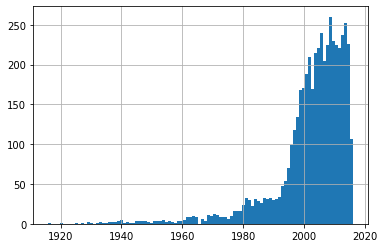

In [8]:
data_m.title_year.hist(bins=102)

The maximum number of movies were released in 2009 (260 movies), followed by 2014 (252 movies) and 2006 (239 movies).

Text(0.5, 1.0, 'Movie Count by Content Rating')

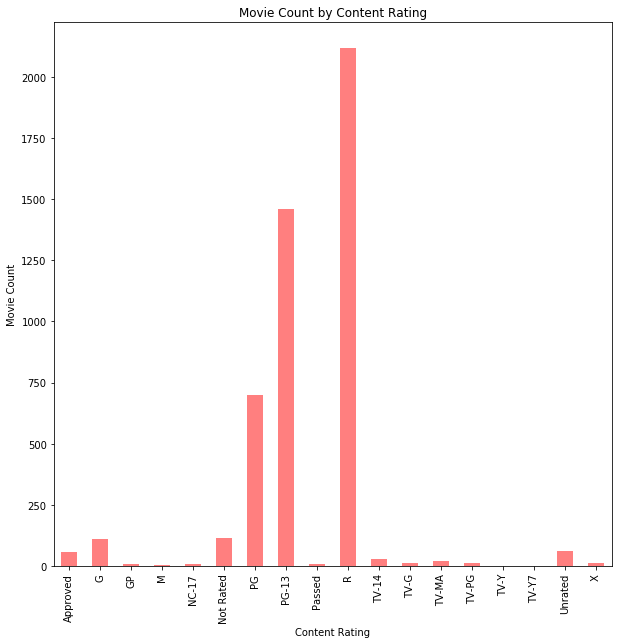

In [9]:
movie_yearly_count = data_m['content_rating'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=90, figsize=(10,10))
movie_yearly_count.set_xlabel('Content Rating')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Content Rating')

The above bar graph indicates that most of the movies released are R rated.

Text(0.5, 1.0, 'Movie Count by IMDB Rating')

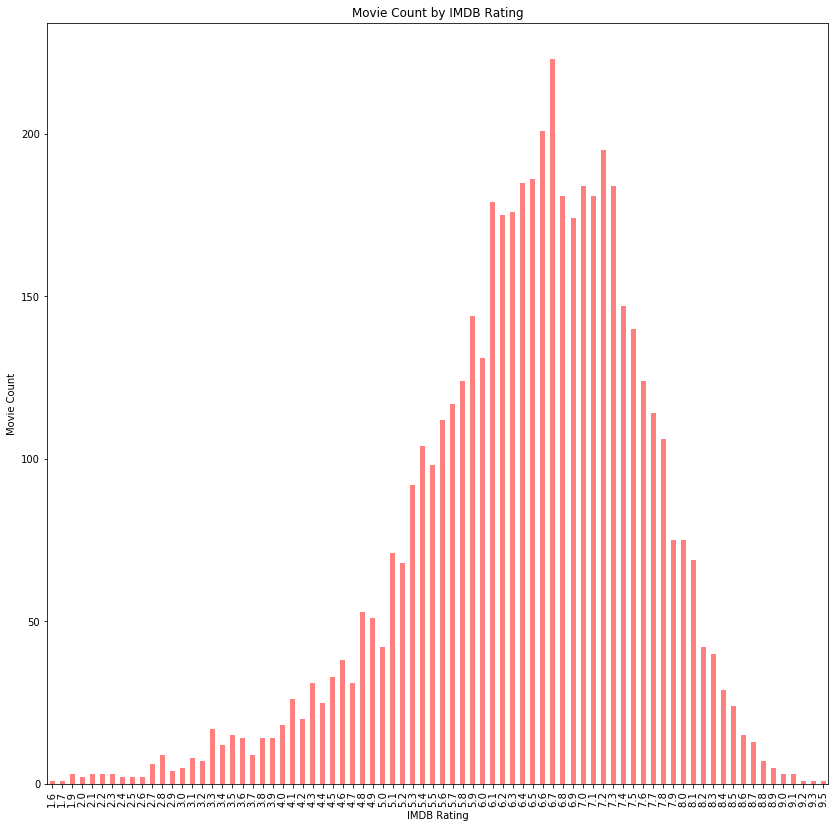

In [10]:
movie_yearly_count = data_m['imdb_score'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=90, figsize=(14,14))
movie_yearly_count.set_xlabel('IMDB Rating')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by IMDB Rating')

More than 200 movies received an IMDB rating of 6.7

In [11]:
#Determine the percent of total entries are attributed to each genre.

unique_genres = data_m['genres'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split('|'))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)


genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = data_m['genres'].str.contains(genre).fillna(False)
    pct = len(data_m[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Short 0.5
Film-Noir 0.6
Family 54.6
News 0.3
War 21.3
Animation 24.2
Game-Show 0.1
Adventure 92.30000000000001
Romance 110.7
Music 32.6
Action 115.3
Drama 259.4
Horror 56.49999999999999
Comedy 187.20000000000002
Sport 18.2
Western 9.700000000000001
Sci-Fi 61.6
Documentary 12.1
Musical 13.200000000000001
Crime 88.9
Mystery 50.0
Fantasy 61.0
Thriller 141.1
Biography 29.299999999999997
Reality-TV 0.2
History 20.7


In [12]:
#genre percentage value
genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Short,0.5
Film-Noir,0.6
Family,54.6
News,0.3
War,21.3
Animation,24.2
Game-Show,0.1
Adventure,92.3
Romance,110.7
Music,32.6


Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

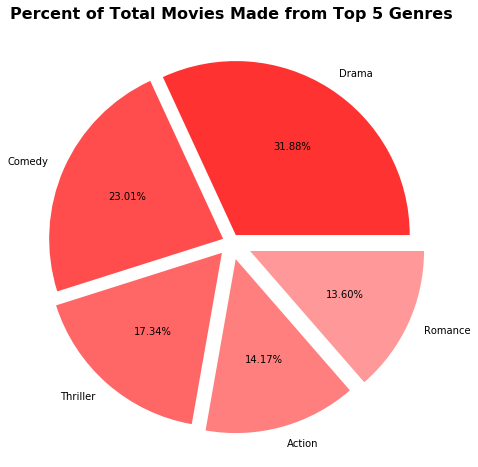

In [13]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

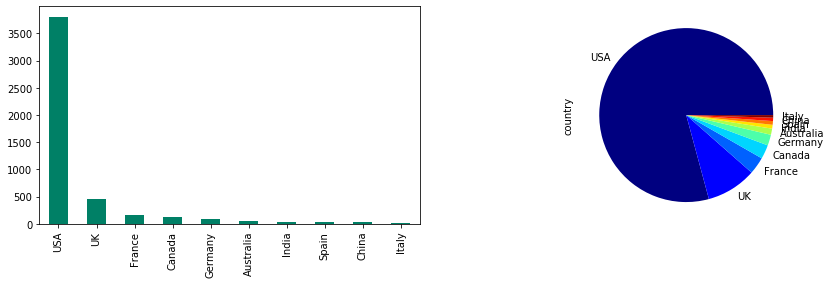

In [14]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
bar = data_m['country'].value_counts().head(10).plot(kind = 'bar',cmap='summer')
bar.set_xticklabels(bar.get_xticklabels(),rotation=90,fontsize=10)
plt.subplot(1,2,2)
data_m['country'].value_counts().head(10).plot(kind = 'pie',cmap='jet',fontsize=10)
plt.show()

The maximum number of movies are associated with USA.

In [15]:
directors = data_m['director_name'].value_counts().head(10)
directors.reset_index()
dir_rev = np.zeros(len(directors))
i = 0
for director in directors.index:
    current_director = data_m['director_name'].str.contains(director).fillna(False)
    director_film_revenue = data_m[current_director].xs('gross', axis=1).sum()
    dir_rev[i] = director_film_revenue
    i += 1
dir_rev_df = pd.DataFrame(dir_rev, index = directors.index, columns=['Revenue (Dollars)'])
dir_rev_df

,Revenue (Dollars)
Steven Spielberg,4.114233e+09
Woody Allen,3.083454e+08
Clint Eastwood,1.378321e+09
Martin Scorsese,9.202871e+08
Ridley Scott,1.337772e+09
Spike Lee,3.285004e+08
Steven Soderbergh,1.050730e+09
Tim Burton,2.071275e+09
Renny Harlin,5.239759e+08
Oliver Stone,6.797927e+08


Revenue each of these top 10 directors' films brought in. 

Text(0.5, 1.0, 'Most Active Directors Revenue Contribution')

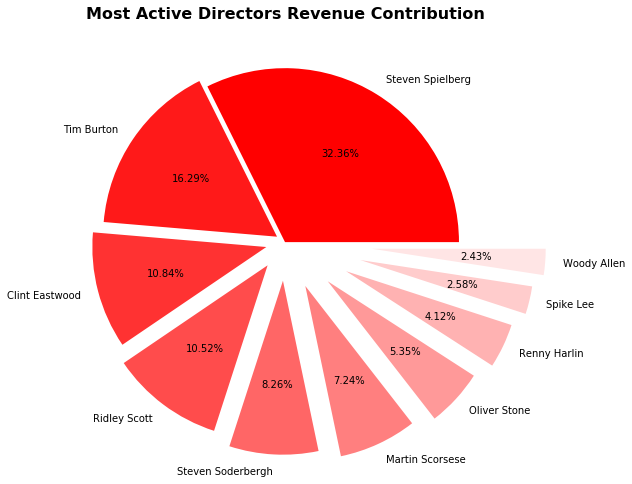

In [16]:
explode = np.linspace(0, 0.5, 10)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
dir_rev_df.sort_values(by='Revenue (Dollars)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)

[Text(0, 0, 'English'),
 Text(0, 0, 'French'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Hindi'),
 Text(0, 0, 'Mandarin'),
 Text(0, 0, 'German'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Cantonese'),
 Text(0, 0, 'Russian'),
 Text(0, 0, 'Italian')]

<Figure size 1080x432 with 0 Axes>

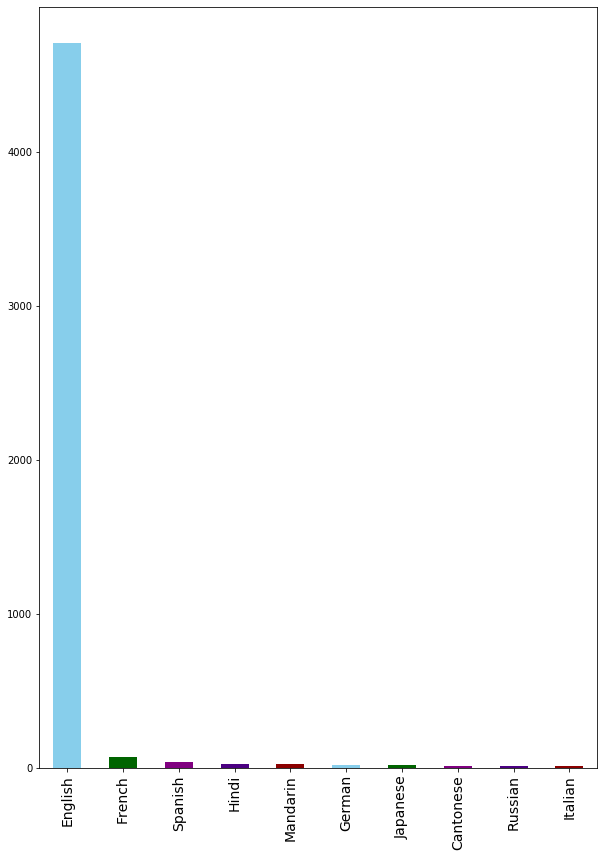

In [17]:
plt.figure(figsize = (15,6))
temp_df = data_m[data_m['language'] != 'Not defined']

plt.figure(figsize=(10,6))
bar = temp_df['language'].value_counts().head(10).plot(kind = 'bar',color = ['skyblue','darkgreen','purple','indigo','darkred'], figsize=(10,14))
bar.set_xticklabels(bar.get_xticklabels(),rotation=90,fontsize=14)